<a href="https://colab.research.google.com/github/SHIBU-69/Labreport_/blob/main/222002061_CSE412_222D3_LabReport03_mlpFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Config -> LR: 0.01, Epochs: 5000, Activation: relu, Accuracy: 0.7500
Accuracy: 0.75
Precision: 0.6666666666444444
Recall: 0.99999999995
F1 Score: 0.79999999992


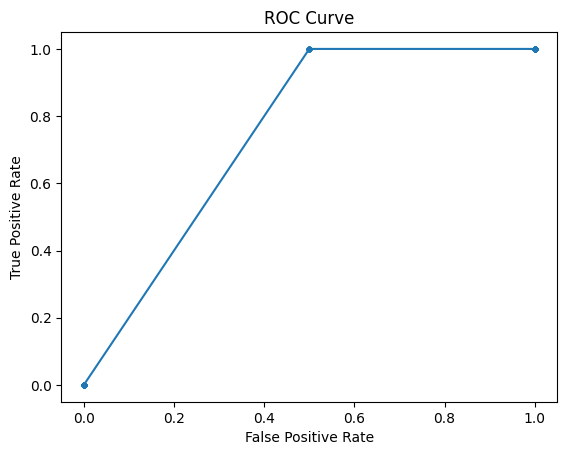

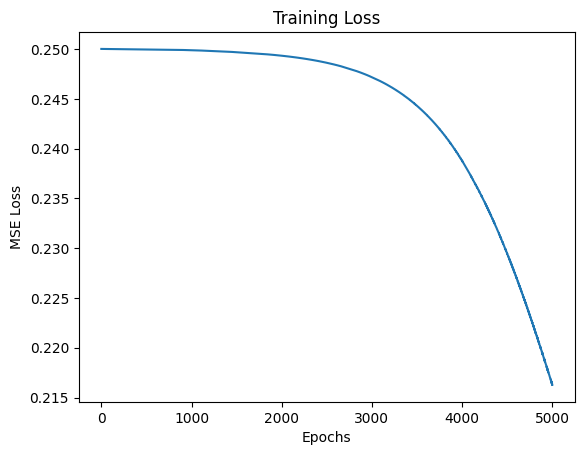

In [27]:
# XOR MLP with Metrics & Plots in Colab

import numpy as np
import matplotlib.pyplot as plt


# Activation functions & derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)


# Metrics from scratch

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-10)

def recall_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-10)

def f1_score(y_true, y_pred):
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec + 1e-10)

def roc_curve(y_true, y_prob, thresholds=100):
    tpr_list = []
    fpr_list = []
    for t in np.linspace(0, 1, thresholds):
        y_pred = (y_prob >= t).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tpr = tp / (tp + fn + 1e-10)
        fpr = fp / (fp + tn + 1e-10)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return np.array(fpr_list), np.array(tpr_list)


# XOR dataset

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])  # XOR labels


# MLP training

def train_mlp(X, y, hidden_activation='sigmoid', lr=0.1, epochs=1000):
    np.random.seed(42)

    # Weight initialization
    W1 = np.random.randn(2, 2) * 0.1
    b1 = np.zeros((1, 2))
    W2 = np.random.randn(2, 1) * 0.1
    b2 = np.zeros((1, 1))

    # Activation selector
    if hidden_activation == 'sigmoid':
        act = sigmoid
        act_deriv = sigmoid_deriv
    elif hidden_activation == 'relu':
        act = relu
        act_deriv = relu_deriv
    else:
        raise ValueError("Activation must be 'sigmoid' or 'relu'")

    losses = []

    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = act(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Loss (Mean Squared Error)
        loss = np.mean((y - a2) ** 2)
        losses.append(loss)

        # Backpropagation
        dz2 = (a2 - y) * sigmoid_deriv(z2)  # output layer error
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, W2.T) * act_deriv(z1)  # hidden layer error
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Weight updates
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    # Final predictions
    y_prob = sigmoid(np.dot(act(np.dot(X, W1) + b1), W2) + b2)
    y_pred = (y_prob >= 0.5).astype(int)

    return W1, b1, W2, b2, y_prob, y_pred, losses


# Hyperparameter tuning

learning_rates = [0.01, 0.1, 0.5]
epochs_list = [500, 1000, 5000]
activations = ['sigmoid', 'relu']

best_config = None
best_acc = 0

for lr in learning_rates:
    for ep in epochs_list:
        for act in activations:
            W1, b1, W2, b2, y_prob, y_pred, losses = train_mlp(X, y, hidden_activation=act, lr=lr, epochs=ep)
            acc = accuracy_score(y, y_pred)
            if acc > best_acc:
                best_acc = acc
                best_config = (lr, ep, act, acc)

print(f"Best Config -> LR: {best_config[0]}, Epochs: {best_config[1]}, Activation: {best_config[2]}, Accuracy: {best_config[3]:.4f}")


# Evaluate best model

lr, ep, act, _ = best_config
W1, b1, W2, b2, y_prob, y_pred, losses = train_mlp(X, y, hidden_activation=act, lr=lr, epochs=ep)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))

# ROC Curve
fpr, tpr = roc_curve(y.flatten(), y_prob.flatten())
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Loss plot
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.show()
